In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 500)

# Normal Distributions

In [3]:
mean2 = [0.01*i for i in range(1,101)]
m = [25,50,75,100]

In [4]:
def regret_normal(m1, m2, n, m):
    entries = []
    for each in m2:
        optimal = int(np.round(max(1,(4/(max(m1,each)-min(m1,each)) * np.log((n*(max(m1,each)-min(m1,each))/4))))))
        mlist = m + [optimal]
        for i in range(len(mlist)):
                
            row = [each-m1, i, mlist[i], n-2*mlist[i]]
            
            regret_list = []
            for j in range(10**3):
                # optimal mean
                max_mean = max(m1, each) 

                # reward accumulated during explore
                m1_reward = m1*(mlist[i])
                m2_reward = each*(mlist[i])
                explore_reward = m1_reward + m2_reward

                # empirical mean for each arm
                m1_explore = sum([np.random.normal(m1, 1) for i in range(mlist[i])])/(mlist[i])
                m2_explore = sum([np.random.normal(each, 1) for i in range(mlist[i])])/(mlist[i])

                # choosing theoretical mean to exploit with (based on higher empirical mean)
                chosen = m1 if m1_explore > m2_explore else each

                # reward accumulated during exploit
                exploit_reward = chosen * (n - 2*mlist[i])

                # total reward (explore and exploit)
                total_reward = explore_reward + exploit_reward

                # optimal reward (explore and exploit using optimal mean)
                true_reward = max_mean * n

                regret_list.append(true_reward - total_reward)
                    
            row.append(np.mean(regret_list))
            entries.append(row)
            
    return pd.DataFrame(entries, columns=['μ2 − μ1','m index', 'm', 'n - 2m', 'regret'])

In [5]:
normal = regret_normal(0, mean2, 10**3, m)
normal.head()

,μ2 − μ1,m index,m,n - 2m,regret
0,0.01,0,25,950,5.0475
1,0.01,1,50,900,4.4150
2,0.01,2,75,850,4.5410
3,0.01,3,100,800,4.7840
4,0.01,4,367,266,4.8404


In [6]:
grouped_m = normal.groupby('m index')['regret'].apply(list)
grouped_m

m index
0    [5.0475, 9.506, 14.145, 17.53, 21.6275, 25.098...
1    [4.415, 8.92, 13.38, 17.408, 19.96, 23.466, 26...
2    [4.541, 8.725, 12.5775, 17.518, 20.1125, 22.04...
3    [4.784, 9.328, 13.296, 16.832, 20.04, 22.656, ...
4    [4.840400000000001, 9.302239999999998, 13.0041...
Name: regret, dtype: object

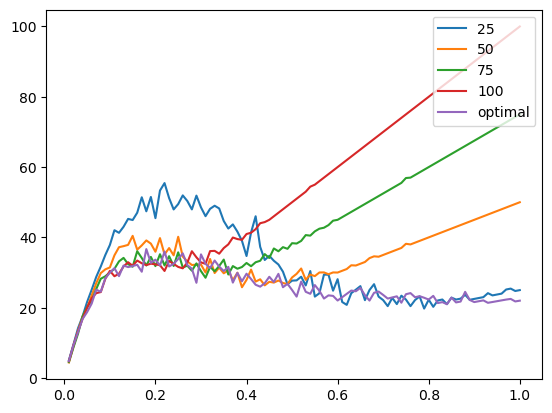

In [7]:
m_labels = ['25','50','75','100','optimal']
for each in grouped_m.index:
    plt.plot(mean2, grouped_m[each], label=m_labels[each])
    
plt.legend(loc="upper right")

# Bernoulli Distributions

In [8]:
prob2 = [0.01*i for i in range(50)] + [0.01*i for i in range(51, 101)]

In [9]:
def regret_bernoulli(b1, b2, n, m):
    entries = []
    for each in b2:
        optimal = int(np.round(max(1,(4/(max(b1,each)-min(b1,each)) * np.log((n*(max(b1,each)-min(b1,each))/4))))))
        mlist = m + [optimal]
        for i in range(len(mlist)):
                
            row = [each-b1, i, mlist[i], n-2*mlist[i]]
            
            regret_list = []
            for j in range(10**3):
                # optimal mean
                max_mean = max(b1, each) 

                # reward accumulated during explore
                b1_reward = b1*(mlist[i])
                b2_reward = each*(mlist[i])
                explore_reward = b1_reward + b2_reward

                # empirical mean for each arm
                b1_explore = sum(np.random.choice([0,1], mlist[i], p=[1-b1, b1]))/mlist[i]
                b2_explore = sum(np.random.choice([0,1], mlist[i], p=[1-each, each]))/mlist[i]
            
                # choosing theoretical mean to exploit with (based on higher empirical mean)
                chosen = b1 if b1_explore > b2_explore else each

                # reward accumulated during exploit
                exploit_reward = chosen * (n - 2*mlist[i])

                # total reward (explore and exploit)
                total_reward = explore_reward + exploit_reward

                # optimal reward (explore and exploit using optimal mean)
                true_reward = max_mean * n

                regret_list.append(true_reward - total_reward)
                    
            row.append(np.mean(regret_list))
            entries.append(row)
            
    return pd.DataFrame(entries, columns=['μ2 − μ1','m index', 'm', 'n - 2m', 'regret'])

In [10]:
bernoulli = regret_bernoulli(0.5, prob2, 1000, m)
bernoulli.head()

,μ2 − μ1,m index,m,n - 2m,regret
0,-0.5,0,25,950,12.5
1,-0.5,1,50,900,25.0
2,-0.5,2,75,850,37.5
3,-0.5,3,100,800,50.0
4,-0.5,4,39,922,19.5


In [11]:
bernoulli_m = bernoulli.groupby('m index')['regret'].apply(list)
bernoulli_m

m index
0    [12.5, 12.25, 12.0, 11.75, 11.5, 11.25, 11.0, ...
1    [25.0, 24.5, 24.0, 23.5, 23.0, 22.5, 22.0, 21....
2    [37.5, 36.75, 36.0, 35.25, 34.5, 33.75, 33.0, ...
3    [50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43....
4    [19.5, 19.110000000000014, 19.199999999999985,...
Name: regret, dtype: object

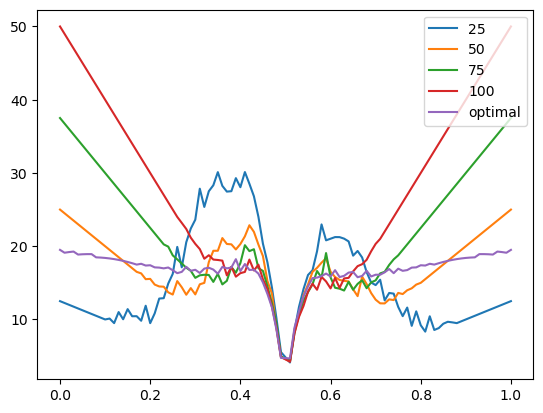

In [12]:
bernoulli_labels = ['25','50','75','100','optimal']
for each in bernoulli_m.index:
    plt.plot(prob2, bernoulli_m[each], label=bernoulli_labels[each])
    
plt.legend(loc="upper right")